In [182]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data

In [146]:
ERAKONNAD_FOLDER='data/raw/erakonnad/'
erakonnad_files=os.listdir(ERAKONNAD_FOLDER)
erakonnad_files

['EESTIMAA_ÜHENDATUD_VASAKPARTEI.csv',
 'Eesti_Iseseisvuspartei.csv',
 'Eesti_Keskerakond.csv',
 'Eesti_Konservatiivne_Rahvaerakond.csv',
 'Eesti_Reformierakond.csv',
 'Eesti_Tulevikuerakond.csv',
 'Eesti_Vabaduspartei_-_Põllumeeste_Kogu.csv',
 'Erakond_Eestimaa_Rohelised.csv',
 'Erakond_Eesti_200.csv',
 'ISAMAA_Erakond.csv',
 'Rahva_Ühtsuse_Erakond.csv',
 'Sotsiaaldemokraatlik_Erakond.csv']

In [147]:
df_erakonnad=pd.DataFrame()
for erakond in erakonnad_files:
    df_=pd.read_csv(f'{ERAKONNAD_FOLDER}/{erakond}', sep=';')
    df_['erakond']=erakond.replace('.csv', '')
#     df_erakonnad=df_erakonnad.append(df_)
    df_erakonnad=pd.concat([df_erakonnad, df_])

In [148]:
df_erakonnad.shape

(52935, 6)

In [149]:
df_erakonnad.head()

,Eesnimi,Perekonnanimi,Sünniaeg,Liikmeks astumise aeg,Erakondliku kuuluvuse peatamine,erakond
0,Zoja,Dudtšak,03.12.1951,01.01.2009,NaN,EESTIMAA_ÜHENDATUD_VASAKPARTEI
1,Arkadi,Gorlatš,21.02.1961,03.05.1996,NaN,EESTIMAA_ÜHENDATUD_VASAKPARTEI
2,Urmas,Jamštšinski,02.11.1974,26.04.2002,NaN,EESTIMAA_ÜHENDATUD_VASAKPARTEI
3,Aivar,Johanson,04.05.1957,15.05.1998,NaN,EESTIMAA_ÜHENDATUD_VASAKPARTEI
4,Ervin,Juhanson,26.04.1958,15.08.1996,NaN,EESTIMAA_ÜHENDATUD_VASAKPARTEI


In [150]:
df_etis=pd.read_csv('data/raw/etis/etis.csv')
df_etis.shape

(15601, 30)

In [151]:
#no need for the dead ones
df_etis=df_etis[pd.isnull(df_etis.DateOfDeath)]
df_etis.shape

(15452, 30)

## Merge

In [152]:
df_etis.head()

,Guid,PersonGuid,PersonName,DateOfBirth,DateOfDeath,Email,Phone,Phone2,Description,Homepage,...,Publications,Degrees,Mentorships,ScientificEquipments,Projects,ResearchAreasCercs,ResearchAreasEtis,ServiceAdditionalInfos,IndustrialProperties,GoogleScholarProfile
0,7ecd0457-d6d3-4519-a78b-7544e1018862,2f0a87b1-b630-4667-befb-f11cf61ee771,Bradley Thayer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,[],[],[],[],[],[],[],[],[],NaN
1,7783047b-4819-4dee-a3fe-ba1c7729de91,7783047b-4819-4dee-a3fe-ba1c7729de91,Erik Georg William Kõvamees,17.01.1992,NaN,NaN,NaN,NaN,NaN,NaN,...,[],"[{'DisplayInfo': 'Erik Georg William Kõvamees,...",[],[],[],[],[],[],[],NaN
2,fae3d52f-0431-427a-b917-343dedacd6b0,fae3d52f-0431-427a-b917-343dedacd6b0,Christine Lumen,13.02.1990,NaN,NaN,NaN,NaN,NaN,NaN,...,[],"[{'DisplayInfo': 'Christine Lumen, magistrikra...",[],[],[],[],[],[],[],NaN
3,a30bf3dc-0d9e-4791-9881-6ffb0433e900,a30bf3dc-0d9e-4791-9881-6ffb0433e900,Ardo Reinsalu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,[],[],[],[],[],[],[],[{'DisplayInfo': '2014 – 2016 Eesti Haigekassa...,[],NaN
4,0012ca2c-828b-4c46-b2c3-1f1eeede89e4,0012ca2c-828b-4c46-b2c3-1f1eeede89e4,Sven Kunsing,21.11.1972,NaN,NaN,NaN,NaN,NaN,NaN,...,[],"[{'DisplayInfo': 'Sven Kunsing, magistrikraad,...",[],[],[],[],[],[],[],NaN


In [153]:
df_etis.columns

Index(['Guid', 'PersonGuid', 'PersonName', 'DateOfBirth', 'DateOfDeath',
       'Email', 'Phone', 'Phone2', 'Description', 'Homepage', 'ResearcherId',
       'OrcId', 'OtherNames', 'OccupationInfos', 'EducationPaths',
       'ResearchActivities', 'CreativeActivities',
       'QualificationAdditionalInfos', 'ResearchAwards',
       'ResearchDirectionInfos', 'Publications', 'Degrees', 'Mentorships',
       'ScientificEquipments', 'Projects', 'ResearchAreasCercs',
       'ResearchAreasEtis', 'ServiceAdditionalInfos', 'IndustrialProperties',
       'GoogleScholarProfile'],
      dtype='object')

In [154]:
pd.isnull(df_erakonnad.Sünniaeg).sum()

0

In [155]:
pd.isnull(df_etis.DateOfBirth).sum()

3981

In [156]:
df_etis['PersonName_lower']=df_etis.PersonName.str.lower()
df_erakonnad['nimi_lower']=df_erakonnad.Eesnimi.str.lower()+' '+df_erakonnad.Perekonnanimi.str.lower()

#### merge ones who have name and date of birth

In [157]:
df_etis_bdy=df_etis[~pd.isnull(df_etis.DateOfBirth)]
df_etis_bdy.shape

(11471, 31)

In [158]:
df_etis_no_bdy=df_etis[pd.isnull(df_etis.DateOfBirth)]
df_etis_no_bdy.shape

(3981, 31)

In [159]:
df_merged=pd.merge(df_erakonnad, df_etis_bdy[['PersonName_lower', 'DateOfBirth','PersonGuid']],
                   left_on=['nimi_lower', 'Sünniaeg'],
                   right_on=['PersonName_lower', 'DateOfBirth'], 
                   how='left')
df_merged.shape

(52935, 10)

In [160]:
df_merged.PersonName_lower.value_counts()

alfred puro           1
age kristel kartau    1
jaak kals             1
friedrich kaasik      1
jaan järvik           1
                     ..
mari-anne meister     1
christine lumen       1
mati lukas            1
marek link            1
pärje ülavere         1
Name: PersonName_lower, Length: 364, dtype: int64

#### try to merge ones who have only names

In [161]:
df_merged['etis_wo_bday']=is_in_etis=np.where((pd.isnull(df_merged.PersonName_lower))&(df_merged.nimi_lower.isin(df_etis_no_bdy.PersonName_lower.tolist())),
          'yes', 'no')

In [162]:
df_merged['etis_wo_bday'].value_counts()

no     52717
yes      218
Name: etis_wo_bday, dtype: int64

In [163]:
df_merged[df_merged['etis_wo_bday']=='yes'].Perekonnanimi.value_counts()

Tamm        9
Sepp        8
Kask        7
Liiv        5
Oja         5
           ..
Heinsalu    1
Hiiemäe     1
Hinn        1
Hoop        1
Tuul        1
Name: Perekonnanimi, Length: 164, dtype: int64

In [164]:
df_merged[df_merged['etis_wo_bday']=='yes'].nimi_lower.value_counts()

kaarel oja          3
katrin sepp         3
jelena bogdanova    2
andres puusepp      2
mare rebane         2
                   ..
pille hamburg       1
siim heinsalu       1
härmo hiiemäe       1
annika hinn         1
tarmo tuul          1
Name: nimi_lower, Length: 192, dtype: int64

In [165]:
df_merged[df_merged['etis_wo_bday']=='yes'].erakond.value_counts()

Eesti_Reformierakond                      52
Eesti_Keskerakond                         38
ISAMAA_Erakond                            36
Eesti_Konservatiivne_Rahvaerakond         30
Sotsiaaldemokraatlik_Erakond              30
Erakond_Eestimaa_Rohelised                12
Eesti_Iseseisvuspartei                     8
Erakond_Eesti_200                          7
Eesti_Tulevikuerakond                      3
EESTIMAA_ÜHENDATUD_VASAKPARTEI             1
Eesti_Vabaduspartei_-_Põllumeeste_Kogu     1
Name: erakond, dtype: int64

In [166]:
df_merged[~pd.isnull(df_merged['PersonName_lower'])].erakond.value_counts()

ISAMAA_Erakond                            68
Eesti_Reformierakond                      61
Sotsiaaldemokraatlik_Erakond              56
Eesti_Keskerakond                         49
Eesti_Konservatiivne_Rahvaerakond         32
Erakond_Eestimaa_Rohelised                29
Erakond_Eesti_200                         29
Eesti_Tulevikuerakond                     24
Eesti_Iseseisvuspartei                    11
Rahva_Ühtsuse_Erakond                      3
EESTIMAA_ÜHENDATUD_VASAKPARTEI             1
Eesti_Vabaduspartei_-_Põllumeeste_Kogu     1
Name: erakond, dtype: int64

In [167]:
df_merged['is_in_etis']=np.where((~pd.isnull(df_merged['PersonName_lower'])|(df_merged['etis_wo_bday']=='yes')),
                                'yes', 'no')

In [168]:
df_merged['is_in_etis_w_bday']=np.where((~pd.isnull(df_merged['PersonName_lower'])),
                                'yes', 'no')

## Analyze - proportion of persons in ETIS as members of each party

In [169]:
df_merged['is_in_etis'].value_counts()

no     52353
yes      582
Name: is_in_etis, dtype: int64

<AxesSubplot:ylabel='erakond'>

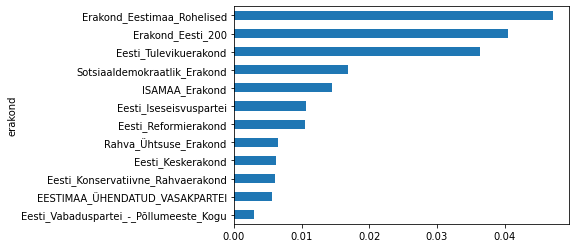

In [170]:
#all names, with and without birthday in ETIS
df_in_etis_perc=df_merged.groupby(['erakond'])['is_in_etis'].value_counts(normalize=True).unstack().sort_values('yes')
df_in_etis_perc['yes'].plot(kind='barh')

In [171]:
df_in_etis_perc['yes'].median(), df_in_etis_perc['yes'].mean()

(0.010626868676583573, 0.017017087708238055)

In [172]:
df_in_etis_perc

is_in_etis,no,yes
erakond,,
Eesti_Vabaduspartei_-_Põllumeeste_Kogu,0.996960,0.003040
EESTIMAA_ÜHENDATUD_VASAKPARTEI,0.994302,0.005698
Eesti_Konservatiivne_Rahvaerakond,0.993866,0.006134
Eesti_Keskerakond,0.993817,0.006183
Rahva_Ühtsuse_Erakond,0.993435,0.006565
Eesti_Reformierakond,0.989475,0.010525
Eesti_Iseseisvuspartei,0.989272,0.010728
ISAMAA_Erakond,0.985505,0.014495
Sotsiaaldemokraatlik_Erakond,0.983164,0.016836


<AxesSubplot:ylabel='erakond'>

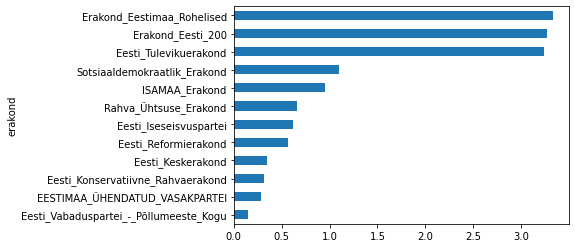

In [173]:
#only names in ETIS with birthdays
df_in_etis_w_bday=perc=df_merged.groupby(['erakond'])['is_in_etis_w_bday'].value_counts(normalize=True).unstack().sort_values('yes')
(df_in_etis_w_bday['yes']*100).plot(kind='barh')

In [174]:
#median and mean of all parties
df_in_etis_w_bday['yes'].median(), df_in_etis_w_bday['yes'].mean()

(0.006387865773271538, 0.01235108224384372)

In [175]:
df_in_etis_w_bday

is_in_etis_w_bday,no,yes
erakond,,
Eesti_Vabaduspartei_-_Põllumeeste_Kogu,0.998480,0.001520
EESTIMAA_ÜHENDATUD_VASAKPARTEI,0.997151,0.002849
Eesti_Konservatiivne_Rahvaerakond,0.996834,0.003166
Eesti_Keskerakond,0.996517,0.003483
Eesti_Reformierakond,0.994318,0.005682
Eesti_Iseseisvuspartei,0.993789,0.006211
Rahva_Ühtsuse_Erakond,0.993435,0.006565
ISAMAA_Erakond,0.990523,0.009477
Sotsiaaldemokraatlik_Erakond,0.989037,0.010963


<AxesSubplot:>

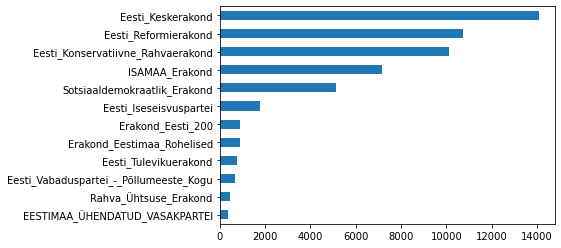

In [176]:
#number of members in parties
df_erakond_llikmed_count=df_merged.erakond.value_counts().sort_values()
df_erakond_llikmed_count.plot(kind='barh')

In [177]:
df_erakond_llikmed_count.sort_index()

EESTIMAA_ÜHENDATUD_VASAKPARTEI              351
Eesti_Iseseisvuspartei                     1771
Eesti_Keskerakond                         14070
Eesti_Konservatiivne_Rahvaerakond         10108
Eesti_Reformierakond                      10736
Eesti_Tulevikuerakond                       742
Eesti_Vabaduspartei_-_Põllumeeste_Kogu      658
Erakond_Eesti_200                           888
Erakond_Eestimaa_Rohelised                  871
ISAMAA_Erakond                             7175
Rahva_Ühtsuse_Erakond                       457
Sotsiaaldemokraatlik_Erakond               5108
Name: erakond, dtype: int64

In [178]:
df_in_etis_w_bday=df_in_etis_w_bday.sort_index()
df_in_etis_w_bday['n']=df_erakond_llikmed_count.sort_index()
df_in_etis_w_bday

is_in_etis_w_bday,no,yes,n
erakond,,,
EESTIMAA_ÜHENDATUD_VASAKPARTEI,0.997151,0.002849,351
Eesti_Iseseisvuspartei,0.993789,0.006211,1771
Eesti_Keskerakond,0.996517,0.003483,14070
Eesti_Konservatiivne_Rahvaerakond,0.996834,0.003166,10108
Eesti_Reformierakond,0.994318,0.005682,10736
Eesti_Tulevikuerakond,0.967655,0.032345,742
Eesti_Vabaduspartei_-_Põllumeeste_Kogu,0.998480,0.001520,658
Erakond_Eesti_200,0.967342,0.032658,888
Erakond_Eestimaa_Rohelised,0.966705,0.033295,871


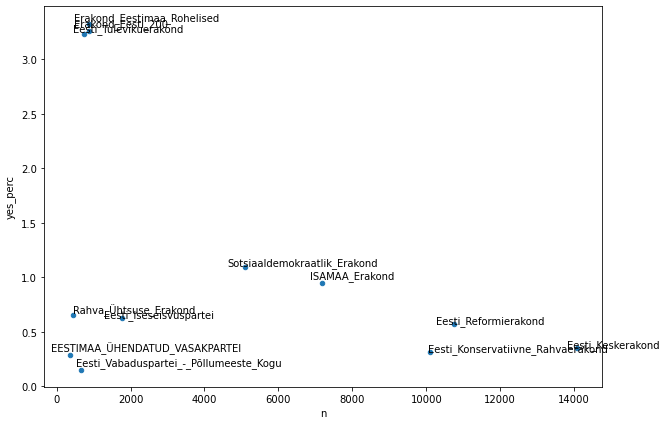

In [212]:
df_in_etis_w_bday['yes_perc']=df_in_etis_w_bday.yes*100
# ax1 = df_in_etis_w_bday.plot.scatter(x='n',
#                                      y='yes_perc',
#                                      c='DarkBlue')
fig, ax = plt.subplots(figsize=(10,7))
df_in_etis_w_bday.plot('n', 'yes_perc', kind='scatter', ax=ax)

for k, v in df_in_etis_w_bday.iterrows():
    ax.annotate(k, (v['n']-np.random.rand()*500, v['yes_perc']+np.random.rand()*0.05))